[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hideaki-kyutech/softcomp2023/blob/main/gym_control_2024.ipynb)


# 制御対象（Cartpole-v1）

## Google ColaboratoryでOpenAI gymを使うための環境設定

In [ ]:
!apt update && apt install xvfb # xvfb(X11の仮想ディスプレイ)
!pip install gym-notebook-wrapper # ColabでGymの描画機能を利用するライブラリ

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,517 kB]
Get:13 http://archiv

## 各種ライブラリのインポート

In [ ]:
import gnwrapper
import gym # OpenAI-gym
import numpy as np
import matplotlib.pyplot as plt

## 変数の説明

- `observation[0]`: Cart Position
- `observation[1]`: Cart Velocity
- `observation[2]`: Pole Angle
- `observation[3]`: Pole Angular Velocity

- `reward`: 棒が立っている状態をキープしているとき 1

- 終了条件(`done=1`となる条件)
 1. Pole Angle が$\pm 12$&deg;以上となった時
 2. Cart Positionが$\pm 2.4$以上となった時
 3. 継続ステップ数が500以上になった時

- `env.action_space.sample()`: 0または1をランダムに出力（0=カートを左に移動、1=カートを右に移動）

## Cartpoleの操作量（右：+1 or 左：0）をランダムで決定した時（ランダム制御時）の挙動を確認する（500 time steps）

In [ ]:
env = gnwrapper.LoopAnimation(gym.make('CartPole-v1')) # Xvfbが起動される
# https://gymnasium.farama.org/environments/classic_control/

observation = env.reset() # 環境の初期化
sum_reward = 0
max_reward = 0

pos_hist = []
vpos_hist = []
ang_hist = []
vang_hist =[]
force_hist = []

for i in range(500):
    force = env.action_space.sample() #乱数で 0 または +1 を決定
    observation, reward, done, info = env.step(force) # random action
    sum_reward += reward
    pos_hist.append(observation[0])
    vpos_hist.append(observation[1])
    ang_hist.append(observation[2])
    vang_hist.append(observation[3])
    env.render() # ここで、描画データを保存する
    if done:
        observation = env.reset()
        print(f"The stick fell down at {i+1}th step.")
        print(f"The total reward is {sum_reward}")
        if max_reward < sum_reward:
          max_reward = sum_reward
        sum_reward = 0

env.display() # ここで、保存した描画データをアニメーションとして表示する
print(f"The max reward is {max_reward}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environme

The stick fell down at 30th step.
The total reward is 30.0
The stick fell down at 47th step.
The total reward is 17.0
The stick fell down at 65th step.
The total reward is 18.0
The stick fell down at 87th step.
The total reward is 22.0
The stick fell down at 98th step.
The total reward is 11.0
The stick fell down at 119th step.
The total reward is 21.0
The stick fell down at 138th step.
The total reward is 19.0
The stick fell down at 154th step.
The total reward is 16.0
The stick fell down at 174th step.
The total reward is 20.0
The stick fell down at 191th step.
The total reward is 17.0
The stick fell down at 205th step.
The total reward is 14.0
The stick fell down at 217th step.
The total reward is 12.0
The stick fell down at 230th step.
The total reward is 13.0
The stick fell down at 244th step.
The total reward is 14.0
The stick fell down at 260th step.
The total reward is 16.0
The stick fell down at 272th step.
The total reward is 12.0
The stick fell down at 295th step.
The total 

The max reward is 42.0


## ランダム制御時のカートの位置の履歴を表示して、累積絶対誤差を計算

29.941685037149


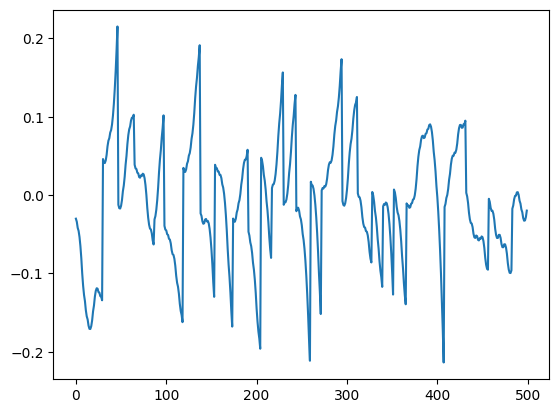

In [ ]:
plt.plot(np.array(pos_hist))
print(sum(abs(np.array(pos_hist))))

## ランダム制御時のカートの速度の履歴を表示して、累積絶対誤差を計算

221.2949037097569


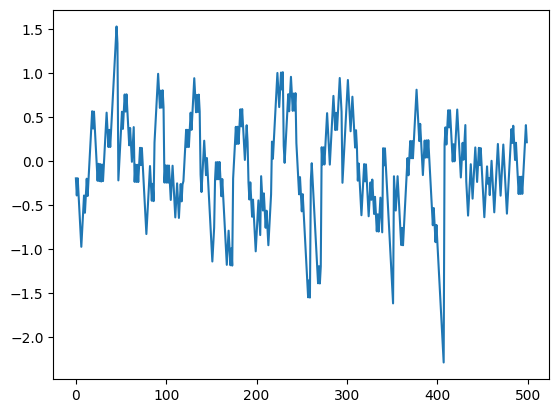

In [ ]:
plt.plot(np.array(vpos_hist))
print(sum(abs(np.array(vpos_hist))))

## ランダム制御時のポールの角度の履歴を表示して、累積絶対誤差を計算

42.1669123663014


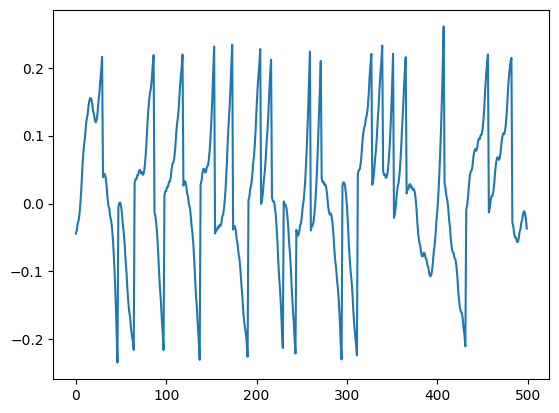

In [ ]:
plt.plot(np.array(ang_hist))
print(sum(abs(np.array(ang_hist))))

## ランダム制御時のポールの角速度の履歴を表示して、累積絶対誤差を計算

362.2252368038171


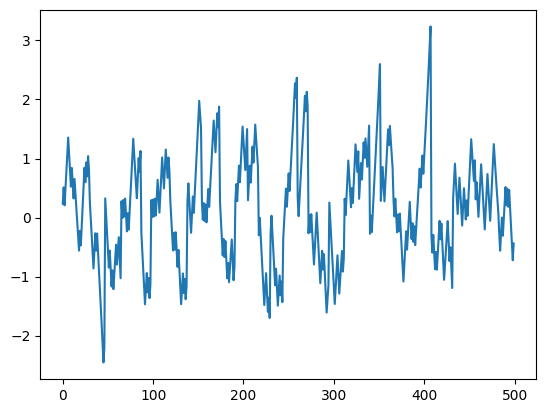

In [ ]:
plt.plot(np.array(vang_hist))
print(sum(abs(np.array(vang_hist))))